# Done by: Gaby Lio (gkl239)


# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, September 13 submitted via Canvas by 11:59 p</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Applications of machine learning (10 pts)

Read the [article](http://www.datasciencecentral.com/profiles/blogs/20-data-science-systems-used-by-amazon-to-operate-its-business) "21 data science systems used by Amazon to operate its business" and pick any two of the data science systems used by Amazon according to this blog.

(5 pts each) For each of these two system you have chosen:

What kind of machine learning problem is involved (e.g. classification, regression, clustering, outlier detection,...)? Speculate on what kind of data may be needed and how the results can be useful to the company.


## Answer

1. Fraud detection for credit card transactions (use decision tree methods). Also detect criminal behavior taking place on AWS for instance. Detect system intrusions and hacking attempts (to prevent stealing data such as credit card data, or prevent employee ID theft, or other malicious activity). 
    - The machine learning problem involved in fraud detection for credit card transactions is a classification problem. You are classifying whether the transaction was fraudulent or not.
    
    - In terms of data, you will need to collect features on fraduelent and non-fradulent transactions to train a model. Since fraud usually make up less than 1% of all transactions you will need to make sure that when you are training the model that you have a big enough sample of fradualent charges in the data set. Some of the features collected in the data could be: time, amount, place of transaction, account number, credit card number, transaction type, type of card, gender, age, and bank. The target variable would be whether the transaction was fraudulent (1) or not (0). 
    
    - Since Amazon's business is online there is a huge opoptunity for credit card fraud to occur. Most fradulent charges are on large value transactions, therefore accounting for huge financial losses when they are all summed up. By detecting fraud, Amazon will be able to save a lot of money, and in the case that it is ID theft, Amazon will keep their customers happy by making sure they do not pay for items that they did not purchase.

2. Recommendation engine (and detection of artificial purchases aimed at fooling these algorithms)
    - One machine learning problem associated with recommendation systems is clustering, especially when thinking about collabortive filtering. Grouping people into clusters based on the items they have purchased allows accurate recommendations of new items for purchase. For example, if two people have liked the same movies, then those people will probably enjoy other movies that the other person has liked as well.
    - They type of data needed for this type of recommendation system would need to be based around a lot of users and a lot of items, which Amazon has. You would need to be able to have data that tracks who purchased what. You can even collect ratings on products. You can then use clustering techniques to create suggestions for users based on their neighbors' preferences.
    - Recommender systems are used to help users find new items or services that they may like, but did not think of searching for on their own becuase of the overwhelming amount of products availabe on Amazon . These types of systems play an important role in helping users to maximize profits. Not only are the consumers happy becuase they are being recommended products they are actually interested in, but the Amazon will increase their profits through the use of recommender systems. 






















# Question 2: Maximum likelihood estimate (10 pts)

Suppose a manager at an internet sales company wants to estimate how fast his salesperson is generating successful leads. Instead of recording the time for each lead, the time taken to generate the next 5 leads are recorded, i.e., there is one recording (denoting the elapsed time) for every 5 consecutive leads. For a specific salesperson, the time intervals recorded are {1,3,1.5,4,2,7,1.2,2,4,3.1} hours. 

A statistician suggests that if these time intervals are assumed to arise by i.i.d. sampling from the following distribution:
$$ p(t) = \frac{1}{C \times \theta^{5}}t^{4}exp^{-\frac{t}{\theta}},$$
(where C is a normalizing constant). Therefore, if $\theta$ can be estimated, then he can provide detailed information
about the lead generation process, including average rates, variances etc.

Find the Maximum Likelihood estimate for $\theta$ based on the recorded observations.


## Answer


In [58]:
timeintervals = [1,3,1.5,4,2,7,1.2,2,4,3.1]
N = len(timeintervals)
theta = sum(timeintervals)/ (5*N)
print theta
print "The Work for how I found what theta was equal to can be found in the picture attached below."

0.576
The Work for how I found what theta was equal to can be found in the picture attached below.


<img src="http://drive.google.com/uc?export=view&id=0B_t7L4-kEPa9UVR5d2ROZHVaN3c">

# Question 3: Multiple Linear Regression in Python (25 pts)

Use the following code to import the boston housing dataset and linear models in python.



In [16]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
boston = datasets.load_boston()

X = boston.data
y = boston.target


The dataset information can be found [here](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset).

a. (3 pts) Print the shape (number of rows and columns) of the feature matrix, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset (506 rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set.  Use the first 400 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

d.  (6 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

e. (5 pts) Use the following code to add new features to the dataset.  You should have 26 variables now.  Note that this code adds one squared term for each variable; in practice one may introduce only a few terms based on domain knowledge or experimentation.  Repeat (c) and report the MSE values of the training set and the test set, respectively.

## Answer



### Part A

In [17]:
df = pd.DataFrame(X)
row_columns = df.shape
print row_columns
df.head()

(506, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Part B

In [18]:
lm = linear_model.LinearRegression()
modelnosplit = lm.fit(X, y)

predictnosplit = lm.predict(X)

print "The coefficients are:  ", pd.DataFrame(lm.coef_)
print "The intercept is: ", lm.intercept_
print "The mean squared error for training/training is: " , mean_squared_error(y, predictnosplit)

The coefficients are:               0
0   -0.107171
1    0.046395
2    0.020860
3    2.688561
4  -17.795759
5    3.804752
6    0.000751
7   -1.475759
8    0.305655
9   -0.012329
10  -0.953464
11   0.009393
12  -0.525467
The intercept is:  36.4911032804
The mean squared error for training/training is:  21.8977792177


### Part C

In [22]:
boston_X_train = X[0:400]
boston_X_test = X[400:]


# # # # Split the targets into training/testing setsboston_y_train = y[:-100]
boston_y_train = y[0:400]
boston_y_test = y[400:]

modelsplit = lm.fit(boston_X_train,boston_y_train)

predictionstrain = lm.predict(boston_X_train)
predictions = lm.predict(boston_X_test)

print "The mean squared error for training/training is: " , mean_squared_error(boston_y_train, predictionstrain)
print "The mean squared error for training/test is: " , mean_squared_error(boston_y_test, predictions)

The mean squared error for training/training is:  22.3052255842
The mean squared error for training/test is:  38.1643386432


### Part D

In [23]:
import numpy as np
import matplotlib.pyplot as plt

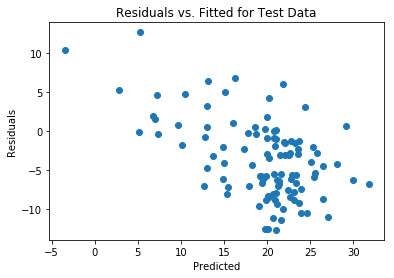

In [24]:
%matplotlib inline
plt.scatter(predictions, boston_y_test - lm.predict(boston_X_test))
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title("Residuals vs. Fitted for Test Data")

I do not believe that the current MLR is a good model. There is a pattern in the residual vs. fitted plot, which means that some transformations to the data must be done to make the residuals normaly distributed without a pattern. You can try things such as adding interactions terms, taking the log of the indepedent variables and the dependent variable, and adding non-linear terms.

### Part E

In [25]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
boston = datasets.load_boston()

X = boston.data
y = boston.target

X = np.concatenate((X, np.square(X)), axis=1)

boston_X_train_squared = X[:-100]
boston_X_test_squared = X[-100:]


# # # Split the targets into training/testing setsboston_y_train = y[:-100]
boston_y_test_squared = y[-100:]
boston_y_train_squared = y[:-100]

model = lm.fit(boston_X_train_squared,boston_y_train_squared)

predictionstrain_squared = lm.predict(boston_X_train_squared)
predictions_squared = lm.predict(boston_X_test_squared)

print "The mean squared error for training/training is: " , mean_squared_error(boston_y_train_squared, predictionstrain_squared)
print "The mean squared error for training/test is: " , mean_squared_error(boston_y_test_squared, predictions_squared)



The mean squared error for training/training is:  14.526768559
The mean squared error for training/test is:  33.1636550931


When adding the interaction terms, the MSE declines by about 5 for the training/test set and about 8 for the training/training set in comparison to Part C. In contrast the mse for training/test is higher than the first MSE we obtained in our simple model without splitting into test and training, with this MSE being 33.163 and the first MSE in part B being 21.89. Although the MSE for training/training in Part E is lower than the MSE in part B.

# Question 4: Ridge and Lasso Regression (25 points)


Using the same boston data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 26 variables. What do you observe from these coefficients? (5pts)

## Answer



### Part 1

In [66]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from patsy import dmatrices
from sklearn.linear_model import Lasso,LassoCV,Ridge, LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

boston = datasets.load_boston()

X = boston.data
y = boston.target

X = np.concatenate((X, np.square(X)), axis=1)

# have to normalize/standardize the data because Lasso/Ridge puts constraints on the size of the coefficents
#associated with each variable however, this value will depend on the magnitude of each variable, so must standardize.
X_scaled = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.33, random_state=20)

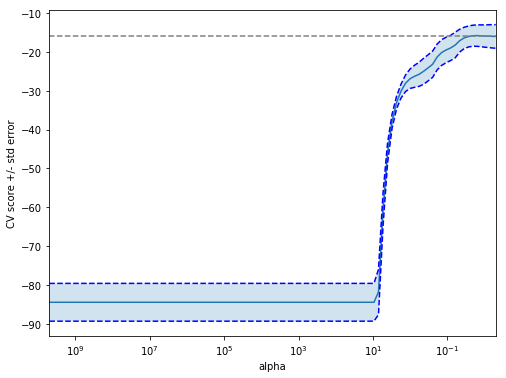

Lasso Alpha: 0.01527
Lasso Score:  -15.8087637474


In [61]:
%matplotlib inline

lasso = Lasso(random_state=0)
alphas =  10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True,scoring='neg_mean_squared_error')
clf.fit(X_train, y_train)

scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
 
plt.show()

m = clf.fit(X_train, y_train).best_estimator_
print ('Lasso Alpha: {:.5f}'.format(m.alpha))
print "Lasso Score: " ,np.max(scores)

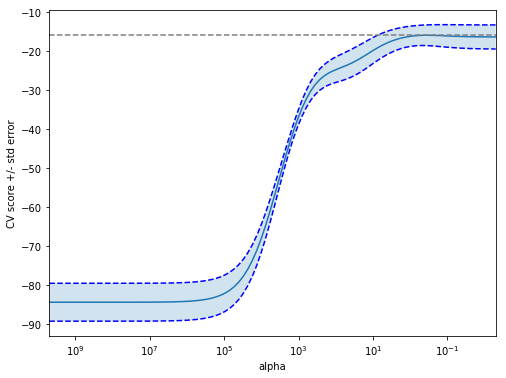

Ridge Alpha: 0.32897
Ridge Score:  -15.9352790776


In [28]:
%matplotlib inline

ridge = Ridge(random_state=0)
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=True, scoring='neg_mean_squared_error')
clf.fit(X_train, y_train)

scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
 
plt.show()

i = clf.fit(X_train, y_train).best_estimator_
print ('Ridge Alpha: {:.5f}'.format(i.alpha))
print "Ridge Score: " ,np.max(scores)

### Part 2

When lambda is very small, the LASSO solution should be very close to the Least sqaures solution, and all of your coefficients are in the model. As lambda grows, the regularization term has greater effect and you will see fewer variables in your model (because more and more coefficients will be zero valued). Same thing goes for ridge regression, except they are not reaching 0 exactly, but very close to zero.

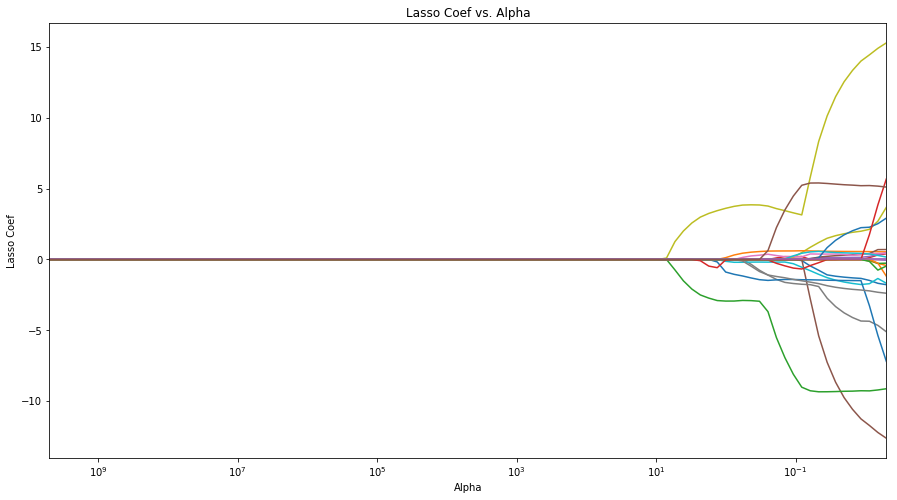

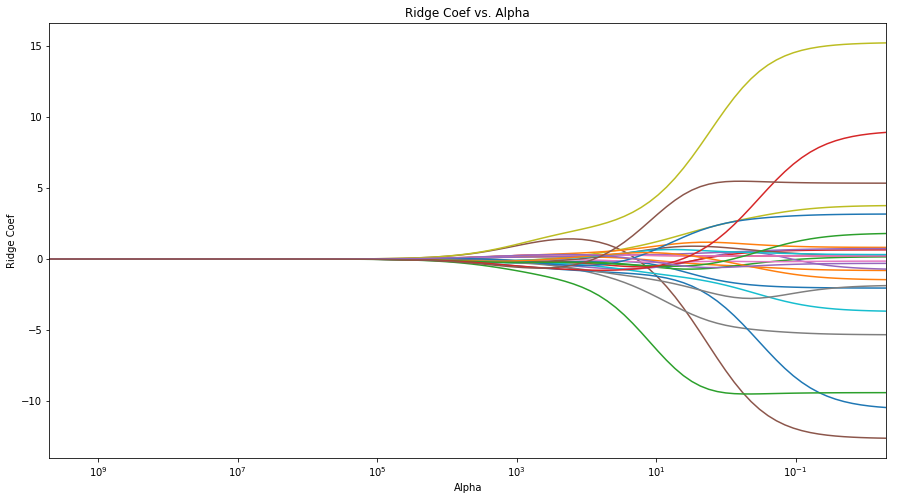

In [35]:
%matplotlib inline

lassocoef = []
ridgecoef = []

for alpha in alphas:
    
    lasso = Lasso(random_state=20, alpha=alpha)
    lasso.fit(X_train, y_train)
    lassocoef.append(lasso.coef_)

    ridge = Ridge(random_state=20, alpha=alpha)
    ridge.fit(X_train, y_train)
    ridgecoef.append(ridge.coef_)

#LASSO PLOT
plt.figure(figsize=(15,8))
plt.plot(alphas, lassocoef)
plt.xlim([alphas[0], alphas[-1]])
plt.xscale('log')
plt.title("Lasso Coef vs. Alpha")
plt.xlabel("Alpha")
plt.ylabel("Lasso Coef")

#RIDGE PLOT
plt.figure(figsize=(15,8))
plt.plot(alphas, ridgecoef)
plt.xlim([alphas[0], alphas[-1]])
plt.xscale('log')
plt.title("Ridge Coef vs. Alpha")
plt.xlabel("Alpha")
plt.ylabel("Ridge Coef")


### Part 3

### OLS

In [30]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
boston = datasets.load_boston()

X = boston.data
y = boston.target

X = np.concatenate((X, np.square(X)), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

modelOLS = lm.fit(X_train, y_train)
predictions_OLS = lm.predict(X_test)
print "The mean squared error for OLS training/test is: " , mean_squared_error(y_test, predictions_OLS)


The mean squared error for OLS training/test is:  17.2979743299


### LASSO

In [31]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
boston = datasets.load_boston()

X = boston.data
y = boston.target

X = np.concatenate((X, np.square(X)), axis=1)
X_scaled = preprocessing.scale(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.33, random_state=20)

lasso = Lasso(random_state=20, alpha= m.alpha)
lasso.fit(X_train, y_train)
predictlasso = lasso.predict(X_test)

print "The mean squared error for LASSO training/test is: " , mean_squared_error(y_test, predictlasso)


The mean squared error for LASSO training/test is:  18.6160935852


### RIDGE

In [33]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
boston = datasets.load_boston()

X = boston.data
y = boston.target

X = np.concatenate((X, np.square(X)), axis=1)
X_scaled = preprocessing.scale(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.33, random_state=20)

ridge = Ridge(random_state=20, alpha= i.alpha)
ridge.fit(X_train, y_train)
predictridge = ridge.predict(X_test)

print "The mean squared error for RIDGE training/test is: " , mean_squared_error(y_test, predictridge)


The mean squared error for RIDGE training/test is:  17.636273952


OLS performed the best, closely followed by RIDGE, and then LASSO actually performed the worst. All three performed relatively the same though with the lowest MSE being 17.29 and the highest being 18.61. For LASSO and RIDGE I decided to standardize the X variables becuase Lasso and Ridge puts constraints on the size of the coefficents associated with each variable however, this value will depend on the magnitude of each variable, so you must standardize, to make sure it is the same across all variables.

### Part 4

In [34]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from patsy import dmatrices
from sklearn.linear_model import Lasso,LassoCV,Ridge, LinearRegression
from sklearn import preprocessing

boston = datasets.load_boston()

X = boston.data
y = boston.target

X = np.concatenate((X, np.square(X)), axis=1)
# have to normalize/standardize the data because asso puts constraints on the size of the coefficents
#associated with each variable however, this value will depend on the magnitude of each variable
X_scaled = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.33, random_state=20)

lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)

g = lassocv.fit(X_train, y_train).alpha_
print "The chosen alpha is: " ,g

lassocvalpha = Lasso(random_state=20, alpha= g)
lassocvalpha.fit(X_train, y_train)
predictlassoalpha = lassocvalpha.predict(X_test)
coefslassoalpha = lassocvalpha.fit(X_train, y_train).coef_

print "The mean squared error for LASSO training/test is: " , mean_squared_error(y_test, predictlassoalpha)
CoefLassoDF = pd.DataFrame(coefslassoalpha)

CoefLassoDF

The chosen alpha is:  0.0166192714263
The mean squared error for LASSO training/test is:  18.6651004846


,0
0,-1.282694
1,-0.000000
2,0.000000
3,0.075106
4,-0.000000
5,-10.333160
6,0.000000
7,-3.999040
8,1.886505
9,-1.661699


You notice that 9 of the 26 variables coefficents are 0! This helps with variable selection automatically, becuase those whose coefficents went to zero should be taken out of the model.

# Question 5  (5 pts)

A regression model that includes "interaction terms" (i.e. quadratic terms of the form $x_ix_j$) as predictors in addition to the linear terms is clearly more general than a corresponding model that employs the same independent variables but only uses the linear terms. Outline two situations where the simpler (less general) model would be preferred to the more powerful model that includes interactive terms.

## Answer
1. You might consider not including any interactions at all and keeping the model simpler, if adding the interaction terms does not have a significant effect in reducing the MSE. Sometimes it's best to stay simple, and add complexity only as needed, since the simpler the model is, the easier it is to interpret the results. You do not want to overspecify a model, especially if you want it to be robust. You should use the fewest terms that you can.

2. You may also not want to include all of the interaction terms becuase it could cause you to overfit your model. A larger sample sizes allow you to make more complex models. For accurate results that are not overfitted, your sample size must be large enough to support the level of complexity added to the model. If your sample size is small, you won’t be able to trust the results. So you wouldn't want to include all interaction effects if you have a small sample size.

